## ***EDA and Visualization***

## ***Circuits***

In [127]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry_convert as pc
import geopandas

import warnings
warnings.filterwarnings('ignore')

In [128]:
circuits = pd.read_csv('../datasets/circuits.csv')
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [130]:
circuits.shape

(77, 9)

In [131]:
circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB


In [132]:
def country_to_continent(country : str):
    name = pc.country_name_to_country_alpha2(country)
    name = pc.country_alpha2_to_continent_code(name)
    name = pc.convert_continent_code_to_continent_name(name)
    return name


'Asia'

In [134]:
circuits['country'] = circuits['country'].replace('UK', 'United Kingdom')
circuits['country'] = circuits['country'].replace('USA', 'United States of America')
circuits['country'] = circuits['country'].replace('UAE', 'United Arab Emirates')
circuits['country'] = circuits['country'].replace('Korea', 'South Korea')
circuits['country'].unique()

array(['Australia', 'Malaysia', 'Bahrain', 'Spain', 'Turkey', 'Monaco',
       'Canada', 'France', 'United Kingdom', 'Germany', 'Hungary',
       'Belgium', 'Italy', 'Singapore', 'Japan', 'China', 'Brazil',
       'United States of America', 'United States',
       'United Arab Emirates', 'Argentina', 'Portugal', 'South Africa',
       'Mexico', 'South Korea', 'Netherlands', 'Sweden', 'Austria',
       'Morocco', 'Switzerland', 'India', 'Russia', 'Azerbaijan',
       'Saudi Arabia', 'Qatar'], dtype=object)

In [135]:
circuits['continent'] = circuits['country'].apply(country_to_continent)
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url,continent
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Oceania
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...,Asia
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...,Asia
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,Europe
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park,Asia
...,...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...,Europe
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit,Europe
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...,Asia
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...,Asia


In [139]:
circuits = circuits.drop(['url'], axis=1)

In [140]:
circuits['alt'] = circuits['alt'].replace('\\N', '0')

In [141]:
circuits.tail()

,circuitId,circuitRef,name,location,country,lat,lng,alt,continent
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.2270,-8.6267,108,Europe
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.9975,11.3719,255,Europe
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.6319,39.1044,15,Asia
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.4542,0,Asia
76,79,miami,Miami International Autodrome,Miami,United States of America,25.9581,-80.2389,0,North America


In [142]:
circuits['continent'].value_counts()

continent
Europe           39
North America    16
Asia             14
South America     3
Africa            3
Oceania           2
Name: count, dtype: int64

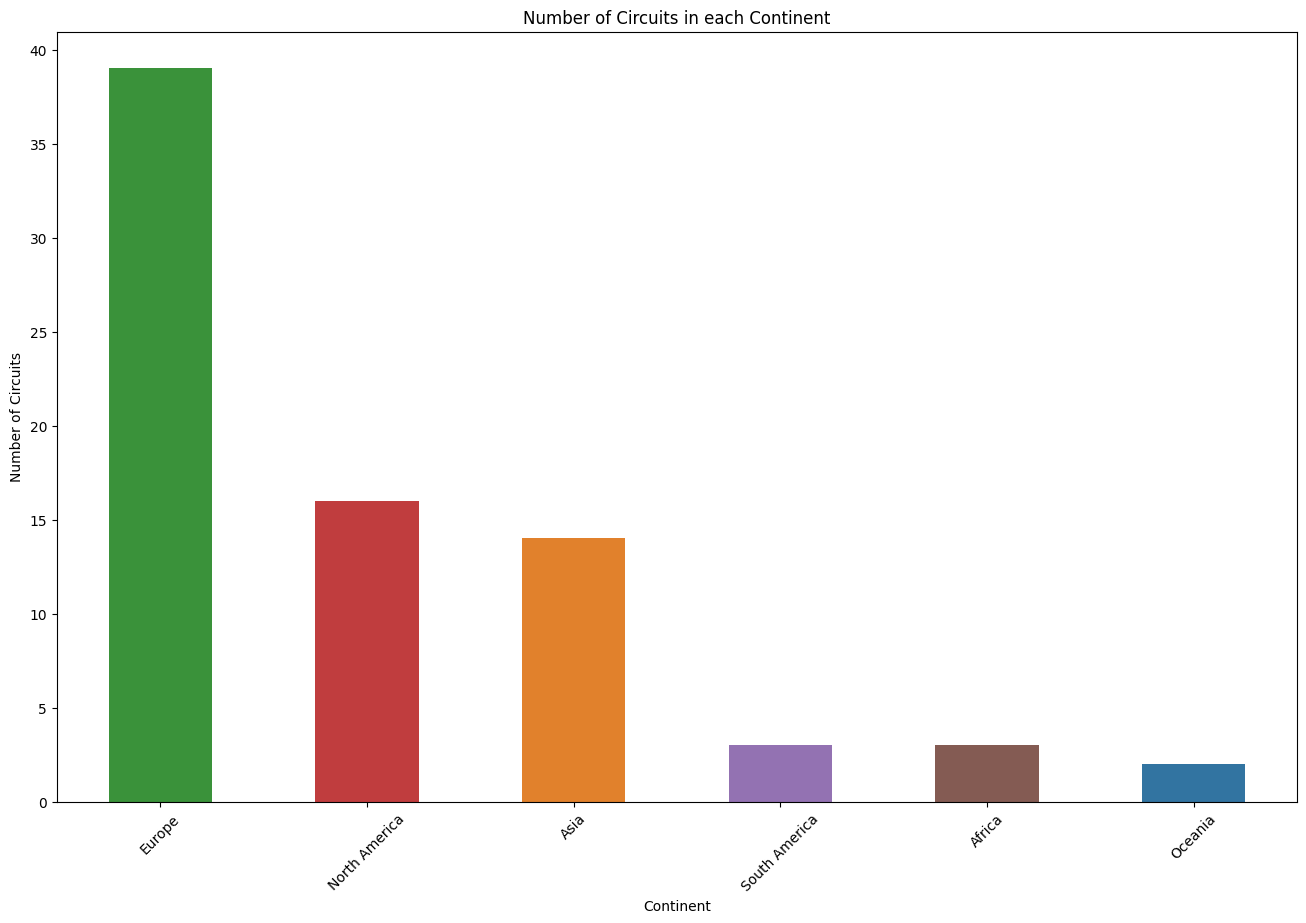

In [183]:
plt.figure(figsize=(16,10))
fig = sns.countplot(circuits, x = 'continent', hue = 'continent', width = 0.5, order = circuits['continent'].value_counts().index)
plt.xlabel('Continent')
plt.ylabel('Number of Circuits')
plt.title('Number of Circuits in each Continent')
plt.xticks(rotation=45)
plt.show()

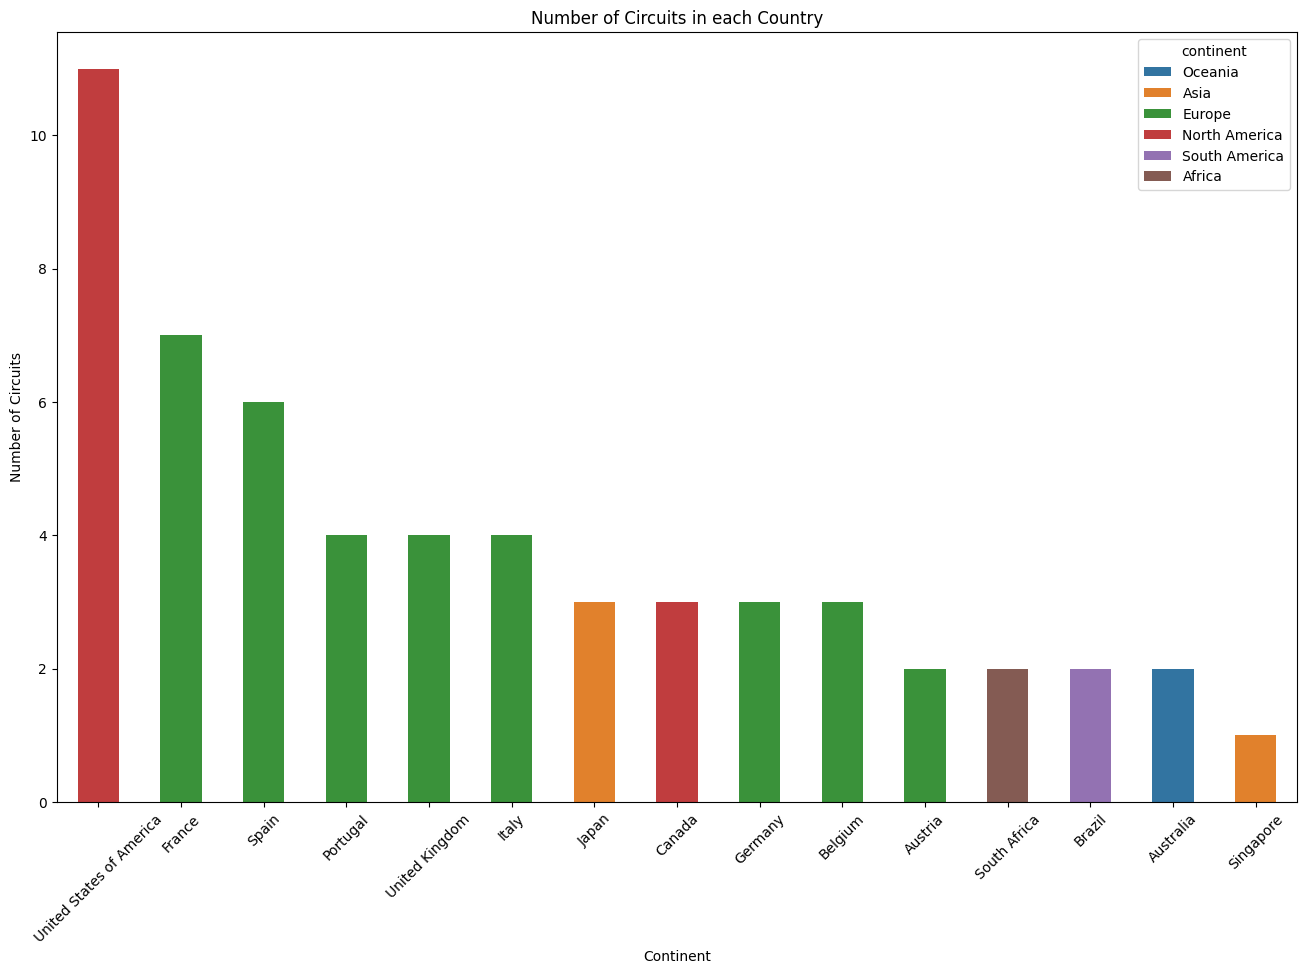

In [187]:
plt.figure(figsize=(16,10))
fig = sns.countplot(circuits, x = 'country', hue = 'continent', width = 0.5, order = circuits['country'].value_counts().nlargest(15).index)
plt.xlabel('Continent')
plt.ylabel('Number of Circuits')
plt.title('Number of Circuits in each Country')
plt.xticks(rotation = 45)
plt.show()

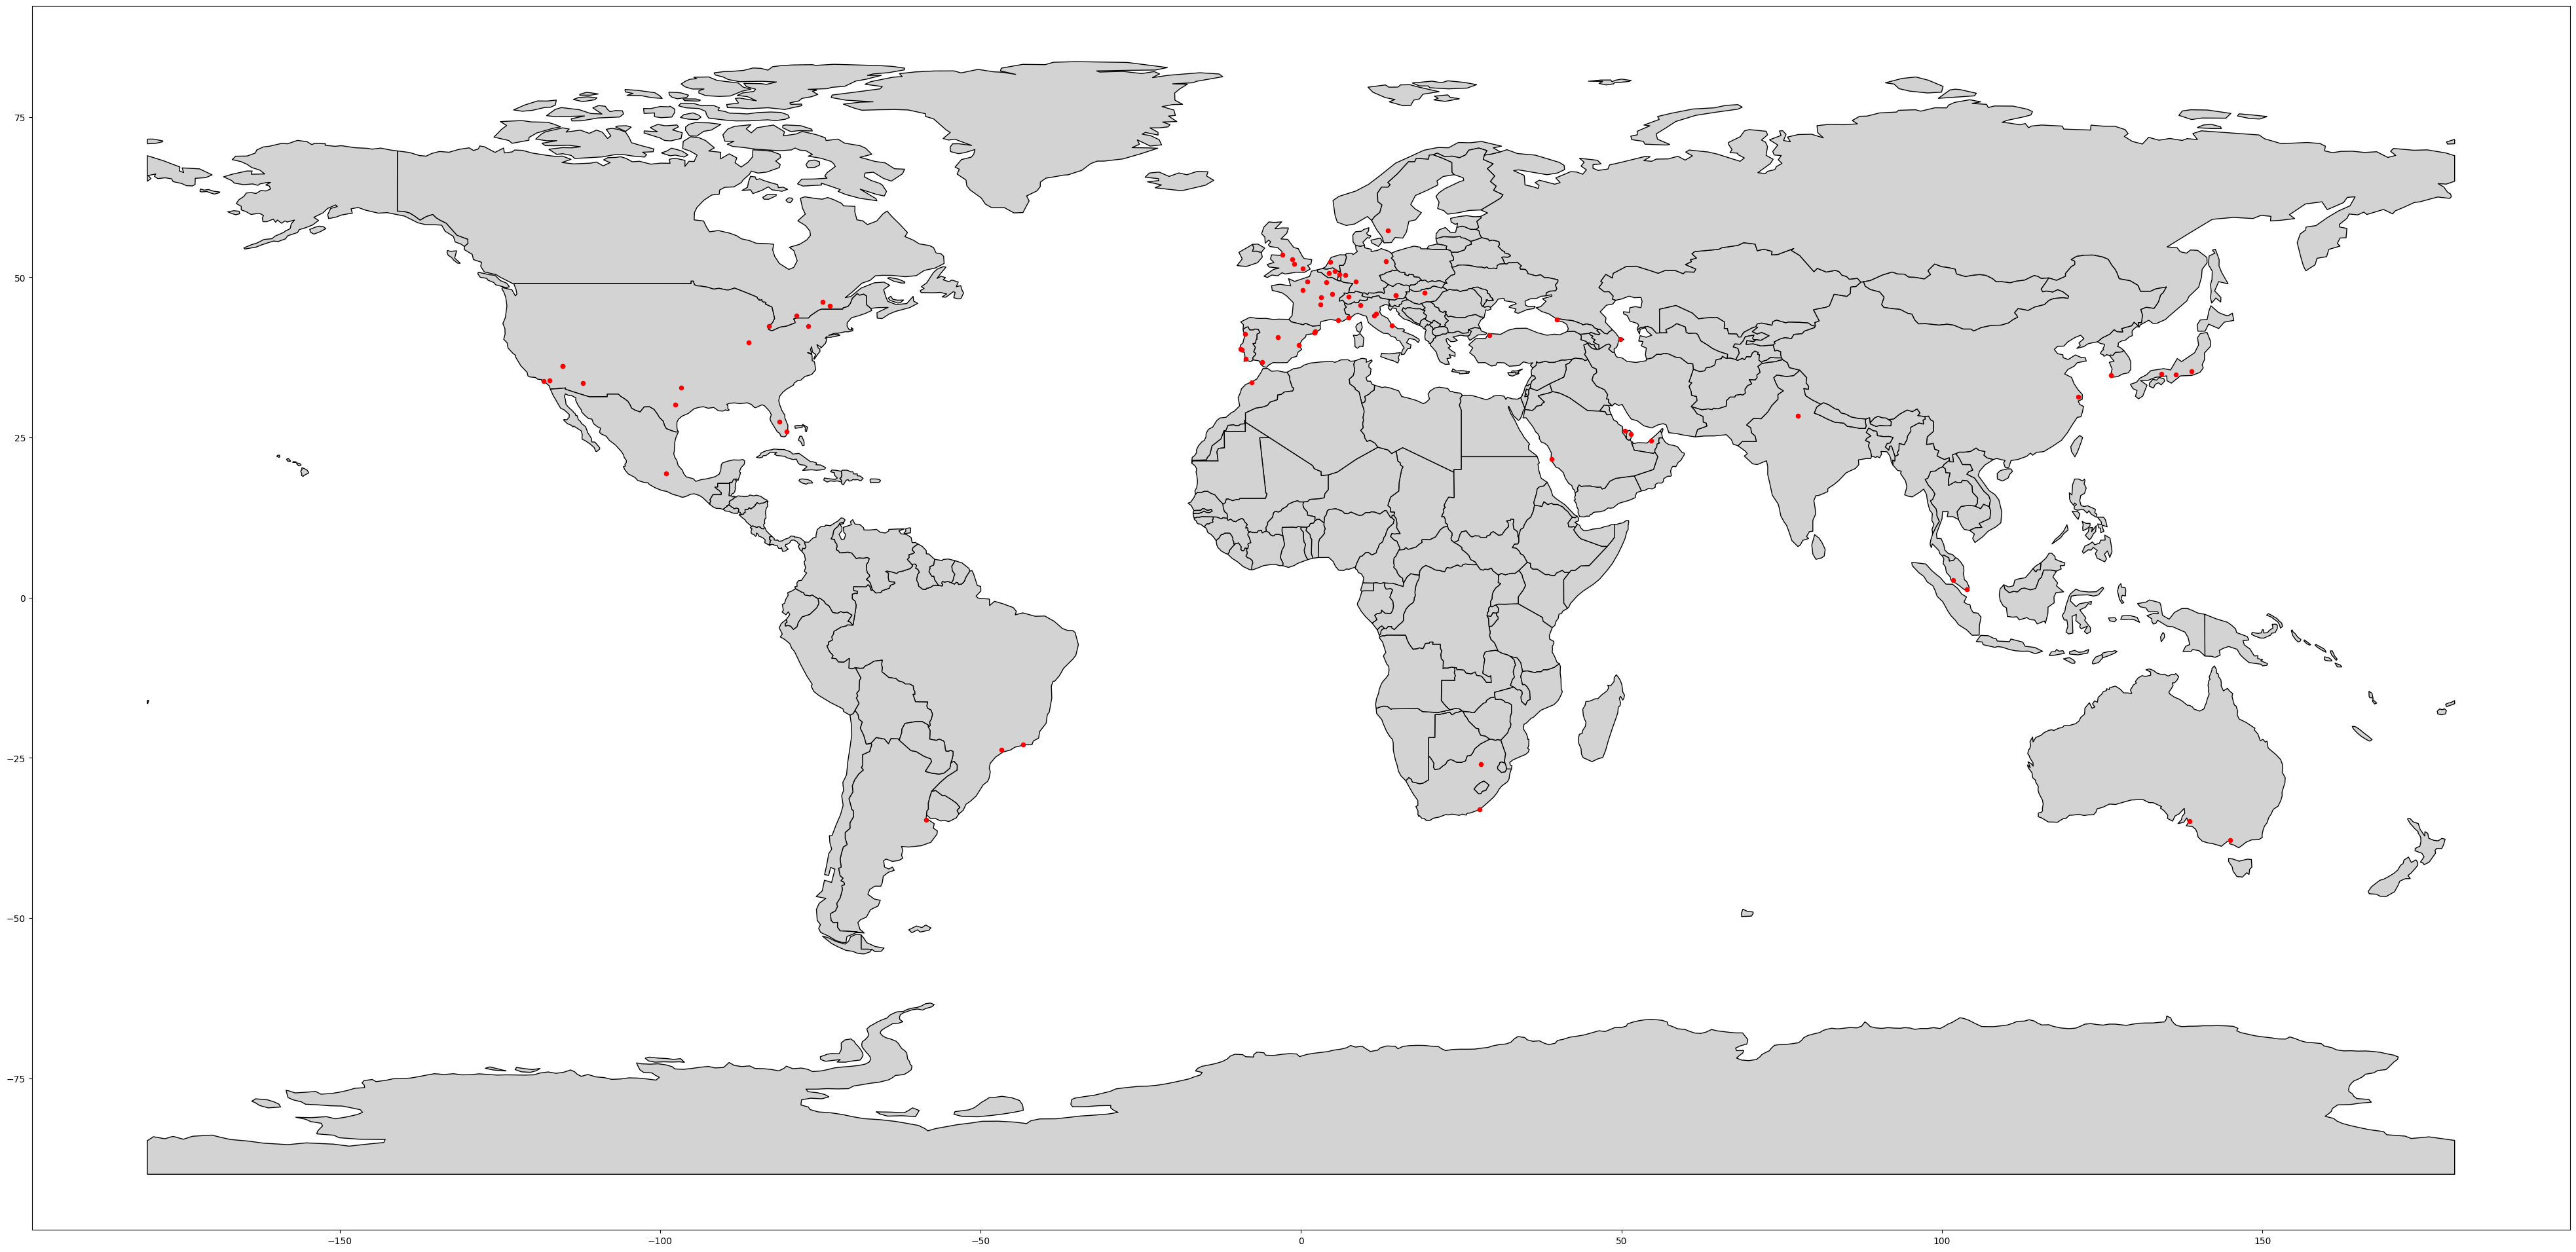

In [188]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
points = geopandas.GeoDataFrame(circuits, geometry=geopandas.points_from_xy(circuits['lng'], circuits['lat']))
ax = world.plot(figsize = (50, 36), color = 'lightgray', edgecolor = 'black')
points.plot(ax = ax, color = 'red', markersize = 20)
plt.show()

In [189]:
fig = px.scatter_geo(circuits, lat='lat', lon='lng', hover_name='name', hover_data=['location', 'country', 'alt'])
fig.update_geos(scope = 'world', resolution=50)
fig.update_traces(marker=dict(size=4))
fig.show()

## ***Races***

### ***Race Analysis***

In [191]:
races = pd.read_csv('../datasets/races.csv')
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
